## Telecom Churn Case Study 
## Business Problem:
#  Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
## Objective :
To Predict the customers who are about to churn from a telecom operator
Business Objective is to predict the High Value Customers only
We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling)
Churn would be based on Usage Requirement

## Approach to Build model 
1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. create churn variable and remove unnecessary data columns

3. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

4. Derive new features.

5. Reduce the number of variables using PCA.

6. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

7. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

8. Finally, choose a model based on some evaluation metric.

## Importing required Libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Loading Telecom Churn Dataset 

In [2]:
tele_churn = pd.read_csv("telecom_churn_data.csv")

In [3]:
# retaining original data to backup dataframe
org_tele_churn = tele_churn.copy(deep=True)

In [4]:
tele_churn.shape

(99999, 226)

In [5]:
tele_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",

In [6]:
tele_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
tele_churn.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

## Creating sub datasets based on data category 
1. ID columns
2. Date Columns
3. Category Columns
4. Numeric columns 

In [8]:
# Creating ID Columns 
ID_cols = ['mobile_number', 'circle_id']

In [9]:
ID_cols

['mobile_number', 'circle_id']

In [10]:
# Creating Date Columns
date_cols= ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9']

In [11]:
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [12]:
# Creating Category Columns 
cat_cols= [  'night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9']

In [13]:
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [14]:
num_cols = [column for column in tele_churn.columns if column not in ID_cols + date_cols + cat_cols]

In [15]:
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

## Pre-process data

In [16]:
# converting column names for (jun_vbc_3g, jul_vbc_3g, aug_vbc_3g, sep_vbc_3g) to (vbc_3g_6, vbc_3g_7, vbc_3g_8, vbc_3g_9)

In [17]:
tele_churn['vbc_3g_6'] = tele_churn['jun_vbc_3g']
tele_churn['vbc_3g_7'] = tele_churn['jul_vbc_3g']
tele_churn['vbc_3g_8'] = tele_churn['aug_vbc_3g']
tele_churn['vbc_3g_9'] = tele_churn['sep_vbc_3g']

# updating num_cols
num_cols.remove('jun_vbc_3g')
num_cols.remove('jul_vbc_3g')
num_cols.remove('aug_vbc_3g')
num_cols.remove('sep_vbc_3g')
num_cols.append('vbc_3g_6')
num_cols.append('vbc_3g_7')
num_cols.append('vbc_3g_8')
num_cols.append('vbc_3g_9')

tele_churn.drop(['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

In [18]:
tele_churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8', 'vbc_3g_9'],
      dtype='object', length=226)

In [19]:
tele_churn.shape

(99999, 226)

#### removing unnecessary columns

In [20]:
# circle_id is same for all the data
tele_churn.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

In [21]:
# removing circle_id column data
tele_churn.drop('circle_id', axis=1, inplace=True)

# updating ID cols
ID_cols.remove('circle_id')

#### checking for missing values

In [22]:
# function to check missing percentage with min_val % included
def cal_missing_percent(df, min_val = 0, sort=False, asc=True):
    df_per = (df.isnull().sum() * 100) / len(df)
    if sort == True:
        return df_per[df_per >= min_val].sort_values(ascending = asc)
    else:
        return df_per[df_per >= min_val]

In [23]:
# look at missing value ratio in each column 
cal_missing_percent(tele_churn)

mobile_number               0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
last_date_of_month_7        0.60
last_date_of_month_8        1.10
last_date_of_month_9        1.66
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t_mou_7            3.86
loc_og_t2t

##### Imputing misisng values of categorical columns

In [24]:
# check misisng values of categorical columns

# Creating Category Columns data
cal_missing_percent(tele_churn[cat_cols])

night_pck_user_6   74.85
night_pck_user_7   74.43
night_pck_user_8   73.66
night_pck_user_9   74.08
fb_user_6          74.85
fb_user_7          74.43
fb_user_8          73.66
fb_user_9          74.08
dtype: float64

In [25]:
## imputing categorical columns with -1
tele_churn[cat_cols] = tele_churn[cat_cols].apply(lambda x: x.fillna(-1))


In [26]:
# checking after imputing null values
cal_missing_percent(tele_churn[cat_cols])

night_pck_user_6   0.00
night_pck_user_7   0.00
night_pck_user_8   0.00
night_pck_user_9   0.00
fb_user_6          0.00
fb_user_7          0.00
fb_user_8          0.00
fb_user_9          0.00
dtype: float64

##### checking data for missing values after imputing

In [27]:
cal_missing_percent(tele_churn, sort=True, asc=False)

count_rech_3g_6            74.85
date_of_last_rech_data_6   74.85
av_rech_amt_data_6         74.85
arpu_3g_6                  74.85
arpu_2g_6                  74.85
count_rech_2g_6            74.85
total_rech_data_6          74.85
max_rech_data_6            74.85
av_rech_amt_data_7         74.43
max_rech_data_7            74.43
count_rech_2g_7            74.43
arpu_2g_7                  74.43
count_rech_3g_7            74.43
date_of_last_rech_data_7   74.43
arpu_3g_7                  74.43
total_rech_data_7          74.43
av_rech_amt_data_9         74.08
count_rech_2g_9            74.08
total_rech_data_9          74.08
arpu_2g_9                  74.08
date_of_last_rech_data_9   74.08
max_rech_data_9            74.08
count_rech_3g_9            74.08
arpu_3g_9                  74.08
arpu_2g_8                  73.66
count_rech_2g_8            73.66
total_rech_data_8          73.66
max_rech_data_8            73.66
av_rech_amt_data_8         73.66
date_of_last_rech_data_8   73.66
count_rech

In [28]:
# we can see recharge columns and ARPU columns has more null values 

In [29]:
# getting recharge columns and arpu columns
rech_cols = tele_churn[num_cols].filter(regex='rech.*', axis=1).columns
arpu_cols = tele_churn[num_cols].filter(regex='arpu.*', axis=1).columns

In [30]:
tele_churn[rech_cols].head(5)
tele_churn[arpu_cols].head(5)

,arpu_6,arpu_7,arpu_8,arpu_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
0,197.38,214.82,213.80,21.10,212.17,212.17,212.17,nan,212.17,212.17,212.17,nan
1,34.05,355.07,268.32,86.28,nan,0.00,0.00,nan,nan,28.61,7.60,nan
2,167.69,189.06,210.23,290.71,nan,nan,nan,2.84,nan,nan,nan,0.00
3,221.34,251.10,508.05,389.50,nan,nan,nan,nan,nan,nan,nan,nan
4,261.64,309.88,238.17,163.43,0.00,nan,nan,nan,0.00,nan,nan,nan


In [31]:
# getting misisng vlaues percentage

cal_missing_percent(tele_churn[rech_cols], sort=True)
cal_missing_percent(tele_churn[arpu_cols], sort=True)

arpu_6       0.00
arpu_7       0.00
arpu_8       0.00
arpu_9       0.00
arpu_3g_8   73.66
arpu_2g_8   73.66
arpu_3g_9   74.08
arpu_2g_9   74.08
arpu_3g_7   74.43
arpu_2g_7   74.43
arpu_3g_6   74.85
arpu_2g_6   74.85
dtype: float64

In [32]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge

tele_churn.loc[(tele_churn.total_rech_data_6.isnull() & tele_churn.date_of_last_rech_data_6.isnull() & tele_churn.count_rech_2g_6.isnull() & tele_churn.arpu_3g_6.isnull() & tele_churn.arpu_2g_6.isnull() &
                tele_churn.total_rech_data_7.isnull() & tele_churn.date_of_last_rech_data_7.isnull() & tele_churn.count_rech_2g_7.isnull() & tele_churn.arpu_3g_7.isnull() & tele_churn.arpu_2g_7.isnull() &
                tele_churn.total_rech_data_8.isnull() & tele_churn.date_of_last_rech_data_8.isnull() & tele_churn.count_rech_2g_8.isnull() & tele_churn.arpu_3g_8.isnull() & tele_churn.arpu_2g_8.isnull() &
                tele_churn.total_rech_data_9.isnull() & tele_churn.date_of_last_rech_data_9.isnull() & tele_churn.count_rech_2g_9.isnull() & tele_churn.arpu_3g_9.isnull() & tele_churn.arpu_2g_9.isnull())
               , ["total_rech_data_6", "date_of_last_rech_data_6", "count_rech_2g_6", "arpu_3g_6", "arpu_2g_6"
                  , "total_rech_data_7", "date_of_last_rech_data_7", "count_rech_2g_7", "arpu_3g_7", "arpu_2g_7"
                  , "total_rech_data_8", "date_of_last_rech_data_8", "count_rech_2g_8", "arpu_3g_8", "arpu_2g_8"
                  , "total_rech_data_9", "date_of_last_rech_data_9", "count_rech_2g_9", "arpu_3g_9", "arpu_2g_9"]].head(5)

,total_rech_data_6,date_of_last_rech_data_6,count_rech_2g_6,arpu_3g_6,arpu_2g_6,total_rech_data_7,date_of_last_rech_data_7,count_rech_2g_7,arpu_3g_7,arpu_2g_7,total_rech_data_8,date_of_last_rech_data_8,count_rech_2g_8,arpu_3g_8,arpu_2g_8,total_rech_data_9,date_of_last_rech_data_9,count_rech_2g_9,arpu_3g_9,arpu_2g_9
3,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan
5,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan
6,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan
7,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan
12,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan


In [33]:
# imputing rech columns missing values as 0 since the nan recharge amount can be considered as no recharge done.

tele_churn[rech_cols] = tele_churn[rech_cols].apply(lambda x: x.fillna(0))
tele_churn[arpu_cols] = tele_churn[arpu_cols].apply(lambda x: x.fillna(0))

In [34]:
tele_churn[rech_cols].head(5)
tele_churn[arpu_cols].head(5)

,arpu_6,arpu_7,arpu_8,arpu_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
0,197.38,214.82,213.80,21.10,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00
1,34.05,355.07,268.32,86.28,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0.00
2,167.69,189.06,210.23,290.71,0.00,0.00,0.00,2.84,0.00,0.00,0.00,0.00
3,221.34,251.10,508.05,389.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,261.64,309.88,238.17,163.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [35]:
# calculating percentages after imputing rech columns

cal_missing_percent(tele_churn[rech_cols])
cal_missing_percent(tele_churn[arpu_cols])

arpu_6      0.00
arpu_7      0.00
arpu_8      0.00
arpu_9      0.00
arpu_3g_6   0.00
arpu_3g_7   0.00
arpu_3g_8   0.00
arpu_3g_9   0.00
arpu_2g_6   0.00
arpu_2g_7   0.00
arpu_2g_8   0.00
arpu_2g_9   0.00
dtype: float64

##### calculating missing values after imputing rech and arpu columns

In [36]:
cal_missing_percent(tele_churn, min_val=0.01, sort=True, asc=False)

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_9   74.08
date_of_last_rech_data_8   73.66
loc_ic_mou_9                7.75
loc_og_t2f_mou_9            7.75
loc_og_t2c_mou_9            7.75
std_ic_t2o_mou_9            7.75
loc_ic_t2t_mou_9            7.75
loc_og_mou_9                7.75
std_ic_t2f_mou_9            7.75
isd_og_mou_9                7.75
std_og_t2t_mou_9            7.75
std_og_mou_9                7.75
std_og_t2m_mou_9            7.75
std_ic_t2m_mou_9            7.75
std_og_t2f_mou_9            7.75
std_ic_mou_9                7.75
loc_og_t2m_mou_9            7.75
std_ic_t2t_mou_9            7.75
spl_og_mou_9                7.75
loc_ic_t2m_mou_9            7.75
onnet_mou_9                 7.75
og_others_9                 7.75
offnet_mou_9                7.75
ic_others_9                 7.75
roam_ic_mou_9               7.75
isd_ic_mou_9                7.75
roam_og_mou_9               7.75
loc_ic_t2f_mou_9            7.75
loc_og_t2t

##### checking missing values for mou columns 

In [37]:
mou_cols = tele_churn[num_cols].filter(regex="mou.*", axis=1).columns

In [38]:
cal_missing_percent(tele_churn[mou_cols], sort=True, asc=False)

isd_ic_mou_9       7.75
loc_og_t2c_mou_9   7.75
loc_og_t2t_mou_9   7.75
std_ic_t2t_mou_9   7.75
loc_og_t2m_mou_9   7.75
loc_ic_mou_9       7.75
loc_ic_t2f_mou_9   7.75
loc_og_t2f_mou_9   7.75
loc_ic_t2m_mou_9   7.75
loc_ic_t2t_mou_9   7.75
std_ic_t2f_mou_9   7.75
loc_og_mou_9       7.75
std_og_t2t_mou_9   7.75
spl_og_mou_9       7.75
isd_og_mou_9       7.75
std_og_t2m_mou_9   7.75
std_og_mou_9       7.75
std_og_t2c_mou_9   7.75
std_ic_t2m_mou_9   7.75
std_og_t2f_mou_9   7.75
roam_og_mou_9      7.75
roam_ic_mou_9      7.75
offnet_mou_9       7.75
std_ic_mou_9       7.75
spl_ic_mou_9       7.75
std_ic_t2o_mou_9   7.75
onnet_mou_9        7.75
loc_ic_t2t_mou_8   5.38
loc_og_mou_8       5.38
offnet_mou_8       5.38
std_og_t2t_mou_8   5.38
spl_og_mou_8       5.38
std_og_t2m_mou_8   5.38
loc_og_t2c_mou_8   5.38
spl_ic_mou_8       5.38
isd_og_mou_8       5.38
isd_ic_mou_8       5.38
onnet_mou_8        5.38
std_og_mou_8       5.38
std_og_t2f_mou_8   5.38
std_og_t2c_mou_8   5.38
std_ic_t2f_mou_8

In [39]:
tele_churn[mou_cols].head(5)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9
0,0.00,0.00,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan
1,0.00,0.00,0.00,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00
2,0.00,0.00,0.00,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.00,0.00,0.00,0.00,0.00,47.64,108.68,120.94,18.04,0.00,0.00,0.00,0.00,46.56,236.84,96.84,42.08,155.33,412.94,285.46,124.94,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,0.00,0.00,0.00,0.00,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,0.21,0.00,0.00,0.45,0.00,0.85,0.00,0.01
3,0.00,0.00,0.00,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,0.00,0.00,0.00,0.00,0.

##### filling missing values for mou columns as 0. Asusming minutes of usage will be 0 for nan's

In [40]:
tele_churn[mou_cols] = tele_churn[mou_cols].apply(lambda x: x.fillna(0))

In [41]:
# calculating missing values after imputing mou columns
cal_missing_percent(tele_churn, sort=True, asc=False)

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_9   74.08
date_of_last_rech_data_8   73.66
ic_others_9                 7.75
og_others_9                 7.75
ic_others_8                 5.38
og_others_8                 5.38
date_of_last_rech_9         4.76
ic_others_6                 3.94
og_others_6                 3.94
og_others_7                 3.86
ic_others_7                 3.86
date_of_last_rech_8         3.62
date_of_last_rech_7         1.77
last_date_of_month_9        1.66
date_of_last_rech_6         1.61
last_date_of_month_8        1.10
last_date_of_month_7        0.60
spl_og_mou_7                0.00
std_og_t2c_mou_8            0.00
std_og_t2c_mou_9            0.00
spl_og_mou_9                0.00
spl_og_mou_8                0.00
std_og_mou_8                0.00
std_og_mou_9                0.00
isd_og_mou_9                0.00
isd_og_mou_8                0.00
isd_og_mou_7                0.00
isd_og_mou_6                0.00
std_og_mou

##### dropping date columns

In [42]:
# dropping date columns
tele_churn.drop(date_cols, axis = 1, inplace=True)

In [43]:
# calculating missing percentages afeter removing date cols
cal_missing_percent(tele_churn, sort=True, asc=False)

ic_others_9          7.75
og_others_9          7.75
ic_others_8          5.38
og_others_8          5.38
ic_others_6          3.94
og_others_6          3.94
ic_others_7          3.86
og_others_7          3.86
total_og_mou_8       0.00
total_og_mou_6       0.00
spl_og_mou_9         0.00
spl_og_mou_8         0.00
spl_og_mou_7         0.00
spl_og_mou_6         0.00
isd_og_mou_9         0.00
isd_og_mou_8         0.00
isd_og_mou_7         0.00
isd_og_mou_6         0.00
std_og_mou_9         0.00
std_og_mou_8         0.00
std_og_mou_7         0.00
std_og_mou_6         0.00
std_og_t2c_mou_9     0.00
std_og_t2c_mou_8     0.00
std_og_t2c_mou_7     0.00
std_og_t2c_mou_6     0.00
std_og_t2f_mou_9     0.00
total_og_mou_7       0.00
vbc_3g_9             0.00
total_og_mou_9       0.00
loc_ic_t2f_mou_9     0.00
std_ic_t2m_mou_7     0.00
std_ic_t2m_mou_6     0.00
std_ic_t2t_mou_9     0.00
std_ic_t2t_mou_8     0.00
std_ic_t2t_mou_7     0.00
std_ic_t2t_mou_6     0.00
loc_ic_mou_9         0.00
loc_ic_mou_8

In [44]:
# remaining columns
othr_cols = ['ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9']

##### imputing remaining columns

In [45]:
tele_churn[othr_cols].describe()

,ic_others_6,ic_others_7,ic_others_8,ic_others_9,og_others_6,og_others_7,og_others_8,og_others_9
count,"96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00"
mean,0.85,1.01,0.97,1.02,0.45,0.03,0.03,0.05
std,11.96,12.67,13.28,12.38,4.13,2.16,2.32,3.64
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"1,362.94","1,495.94","2,327.51","1,005.23",800.89,370.13,394.93,787.79


##### imputing remaining columns with 0 as they can be considered as no calls

In [46]:
tele_churn[othr_cols] = tele_churn[othr_cols].apply(lambda x: x.fillna(0))

#### checking missing percentages

In [47]:
cal_missing_percent(tele_churn)

mobile_number        0.00
loc_og_t2o_mou       0.00
std_og_t2o_mou       0.00
loc_ic_t2o_mou       0.00
arpu_6               0.00
arpu_7               0.00
arpu_8               0.00
arpu_9               0.00
onnet_mou_6          0.00
onnet_mou_7          0.00
onnet_mou_8          0.00
onnet_mou_9          0.00
offnet_mou_6         0.00
offnet_mou_7         0.00
offnet_mou_8         0.00
offnet_mou_9         0.00
roam_ic_mou_6        0.00
roam_ic_mou_7        0.00
roam_ic_mou_8        0.00
roam_ic_mou_9        0.00
roam_og_mou_6        0.00
roam_og_mou_7        0.00
roam_og_mou_8        0.00
roam_og_mou_9        0.00
loc_og_t2t_mou_6     0.00
loc_og_t2t_mou_7     0.00
loc_og_t2t_mou_8     0.00
loc_og_t2t_mou_9     0.00
loc_og_t2m_mou_6     0.00
loc_og_t2m_mou_7     0.00
loc_og_t2m_mou_8     0.00
loc_og_t2m_mou_9     0.00
loc_og_t2f_mou_6     0.00
loc_og_t2f_mou_7     0.00
loc_og_t2f_mou_8     0.00
loc_og_t2f_mou_9     0.00
loc_og_t2c_mou_6     0.00
loc_og_t2c_mou_7     0.00
loc_og_t2c_m

#### chekcing data types

In [48]:
tele_churn.dtypes

mobile_number           int64
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2m_mou_9      float64
loc_og_t2f_mou_6      float64
loc_og_t2f

##### As we can see all columns are of numerical type..


#### removing id columns as they are not needed for models

In [49]:
tele_churn.drop(ID_cols, axis= 1, inplace=True)

In [50]:
tele_churn.shape

(99999, 212)

## Creating churn column

In [51]:
# churn column can be identified by the total ic, og and data usage of 9th month
# churn customer will be 1 and 0 will be non-churn customer

tele_churn['churn'] = (tele_churn[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0).astype(int)

In [52]:
tele_churn.churn.value_counts()

0    89808
1    10191
Name: churn, dtype: int64

In [53]:
# dropping 9 month columns as they are not required anymore
churn_cols = tele_churn.filter(regex="_9.*").columns

In [54]:
# dropping chiurn phase columns

tele_churn.drop(churn_cols, axis=1, inplace=True)

In [55]:
tele_churn.shape


(99999, 161)

## filtering high value customers

To identify High-value customer, we need data of total recharge amount spent by a user per month..

To do this, we will calculate total amount spent.

Total amount will be sum of total recharge amount (calls) + total data amount (2G, 3G)

To calculate total data recharge amount of a user per month, we will do as follows:
<br />
(Total number of data recharges) * (average data recharge) will give total data recharge per month

In [56]:
tele_churn.head(5)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn
0,0.00,0.00,0.00,197.38,214.82,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.00,1.00,1.00,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0,0,0,0,0,0,1,1,1,0,0,0,1.00,1.00,1.00,968,101.20,0.00,30.40,1
1,0.00,0.00,0.00,34.05,355.07,268.32,24.11,78.68,7.68,15.74,99.84,304.76,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.00,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.00,0.00,0.00,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,4,9,11,74,384,283,44,154,65,44,23,30,0.00,1.00,2.00,0.00,154.00,25.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,154.00,50.00,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.61,7.60,-1.00,0.00,0.00,0,1,0,0,0,2,0,0,0,0,0,0,-1.00,1.00,1.00,1006,0.00,0.00,0.00,0
2,0.00,0.00,0.00,167.69,189.06,210.23,11.54,55.24,37.26,143.33,220.59,208.36,0.00,0

In [57]:
total_rech_amt_cols = ['total_rech_amt_6', 'total_rech_amt_7']

In [58]:
# calculating total data amount

tele_churn['total_rech_amt_data_6'] = tele_churn['total_rech_data_6'] * tele_churn['av_rech_amt_data_6']
tele_churn['total_rech_amt_data_7'] = tele_churn['total_rech_data_7'] * tele_churn['av_rech_amt_data_7']

In [59]:
# calculating total amount usage

tele_churn['total_amt_6'] = tele_churn['total_rech_amt_6'] + tele_churn['total_rech_amt_data_6']
tele_churn['total_amt_7'] = tele_churn['total_rech_amt_7'] + tele_churn['total_rech_amt_data_7']

##### now, we have total usage of each customer.
To identify high-value cutomers, we look at 70th percentile and users usage greator than or equal to 70th percentile will be high-value customers

In [60]:
tele_churn[['total_amt_6','total_amt_7']]

,total_amt_6,total_amt_7
0,614.00,504.00
1,74.00,538.00
2,168.00,315.00
3,230.00,310.00
4,252.00,350.00
...,...,...
99994,60.00,110.00
99995,110.00,110.00
99996,197.00,0.00
99997,"2,130.00","1,074.00"


In [61]:
# calculating average amount
tele_churn['av_amt'] = (tele_churn['total_amt_6'] + tele_churn['total_amt_7'])/2

In [62]:
# calculating 70 quantile value and above rows

tele_churn.loc[tele_churn['av_amt'] >= tele_churn['av_amt'].quantile(0.7), :]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn,total_rech_amt_data_6,total_rech_amt_data_7,total_amt_6,total_amt_7,av_amt
0,0.00,0.00,0.00,197.38,214.82,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.00,1.00,1.00,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0,0,0,0,0,0,1,1,1,0,0,0,1.00,1.00,1.00,968,101.20,0.00,30.40,1,252.00,252.00,614.00,504.00,559.00
7,0.00,0.00,0.00,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.00,0.00,0.00,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [63]:
high_cust_churn = tele_churn.loc[tele_churn['av_amt'] >= tele_churn['av_amt'].quantile(0.7), :]

##### __high_cust_churn__ will be the filtered data frame we will be using further for our analysis

## EDA

#### checking basic statistics of the data

In [64]:
high_cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 166 entries, loc_og_t2o_mou to av_amt
dtypes: float64(140), int32(1), int64(25)
memory usage: 38.1 MB


In [65]:
high_cust_churn.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn,total_rech_amt_data_6,total_rech_amt_data_7,total_amt_6,total_amt_7,av_amt
count,"30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00"

In [66]:
high_cust_churn.shape

(30001, 166)

In [67]:
high_cust_churn.dtypes

loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64
loc_og_mou

In [68]:
high_cust_churn.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'aon', 'vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8', 'churn',
       'total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_amt_6',
       'total_amt_7', 'av_amt'],
      dtype='object', length=166)

#### checking the data distribution of churn column

In [69]:
high_cust_churn.churn.describe()

count   30,001.00
mean         0.08
std          0.27
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: churn, dtype: float64

In [70]:
high_cust_churn.churn.value_counts(1)

0   0.92
1   0.08
Name: churn, dtype: float64

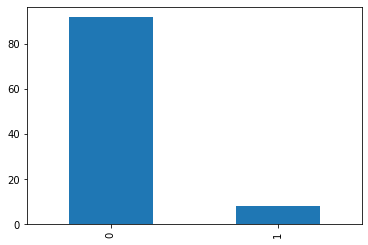

In [71]:
# creating bar plot for the churn column
(high_cust_churn.churn.value_counts(1)*100).plot(kind='bar')
plt.show();

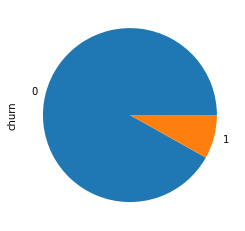

In [72]:
# creating pie plot for the churn column
(high_cust_churn.churn.value_counts(1)*100).plot(kind='pie')
plt.show();

#### creating correlation matrix will consume huge resource because of high features.. We can check correlation after PCA

## univariate analysis

#### analysis on arpu columns

In [73]:
# all arpu cols are continuous variables
arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']

In [74]:
def drawBoxPlots(df, x_col, y_col, subplot_x=10, subplot_y=3, figsize_x=20, figsiz_y = 40):
    plt.figure(figsize=(figsize_x, figsiz_y))

    i = 1
    for col in y_col:
        plt.subplot(subplot_x, subplot_y, i)
        sns.boxplot(data=df, x=x_col, y=col)
        i+=1

    plt.show();

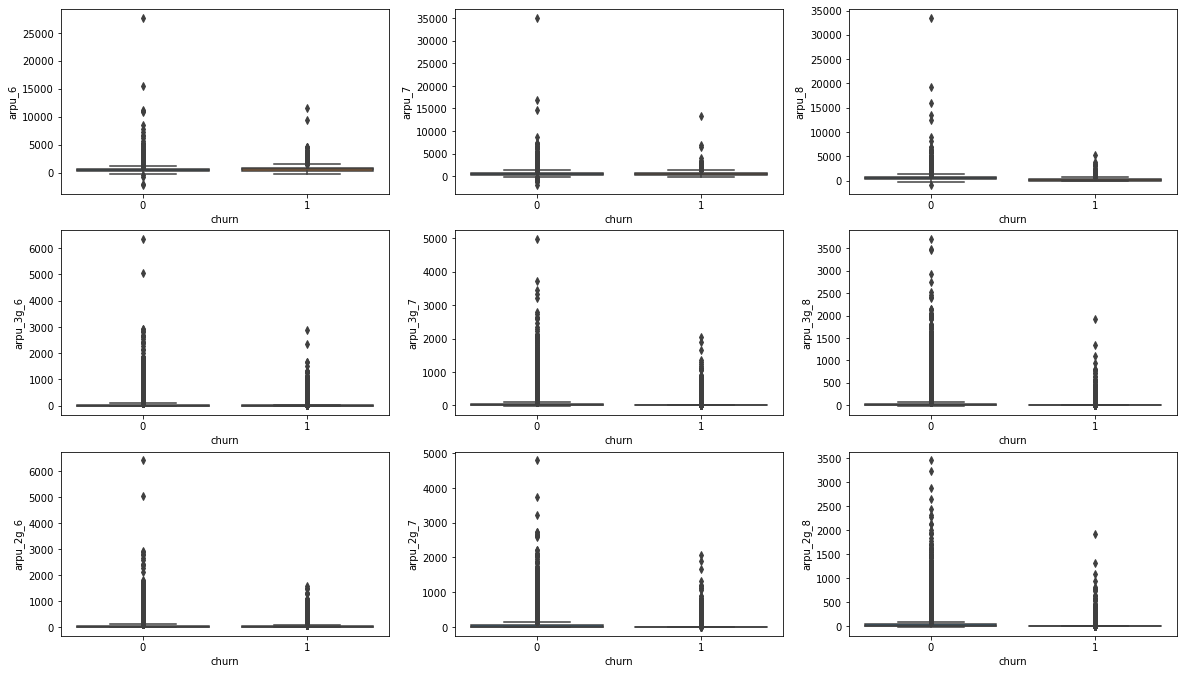

In [75]:
drawBoxPlots(high_cust_churn, 'churn', arpu_cols)

In [76]:
# we can see a large number of outliers present in all arpu cols

#### analysis on mou cols

In [77]:
total_mou_cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

In [78]:
high_cust_churn[total_mou_cols].describe()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,"30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00"
mean,289.95,296.76,279.92,609.87,628.37,551.68
std,365.52,373.75,361.18,690.87,717.22,700.48
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,72.88,78.99,61.36,116.58,116.49,72.36
50%,183.73,187.58,173.11,410.63,425.59,333.54
75%,371.99,377.31,361.73,858.76,891.44,774.78
max,"7,716.14","7,442.86","6,066.63","10,674.03","11,365.31","14,043.06"


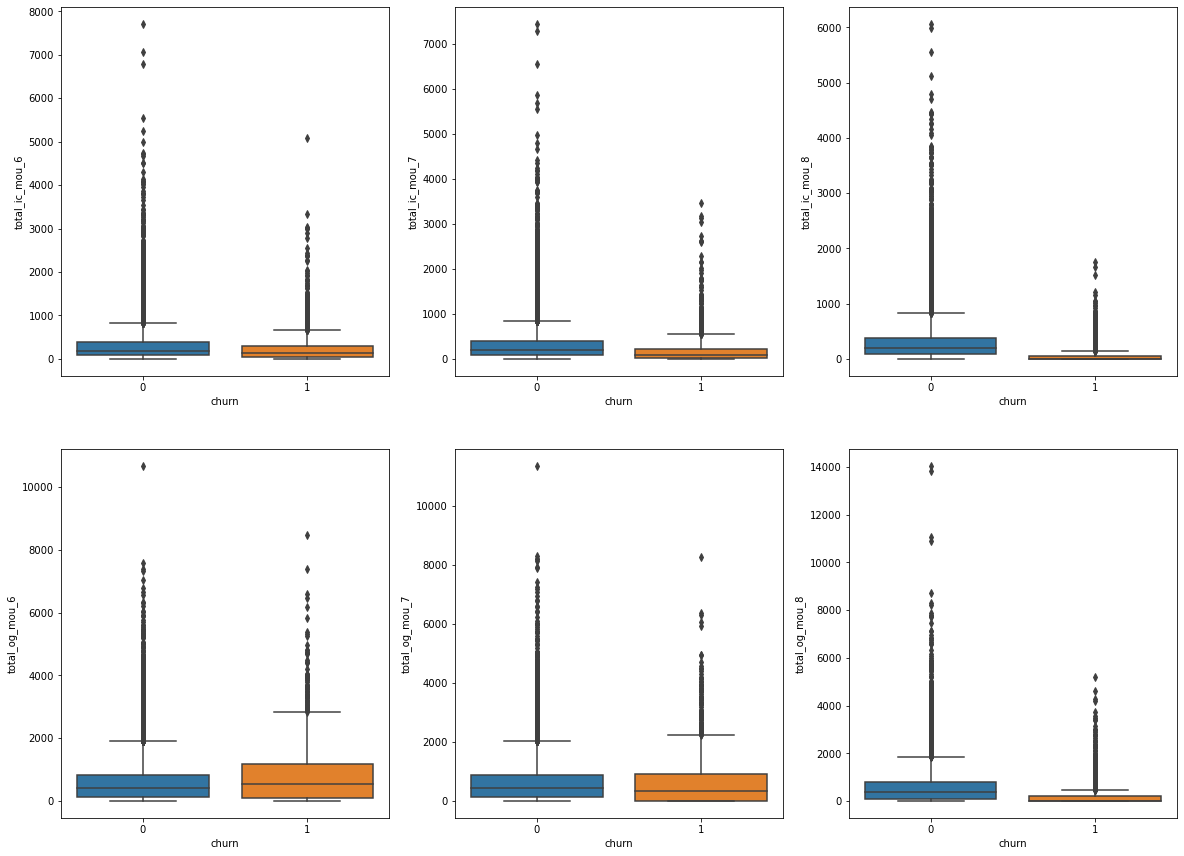

In [79]:
drawBoxPlots(high_cust_churn, 'churn', total_mou_cols, figsiz_y=80)

## Bivariate analysis

In [80]:
# scatter plots between above columns

In [81]:
def drawCorrPlot(corr_mat, figsize_x=7, figsiz_y = 15):
    plt.figure(figsize=(figsize_x, figsiz_y))
    # creating a mask to print only onme half of the heatmap
    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(corr_mat, annot=True, linewidths=0.5, center=0, mask=mask, vmax=.3, square=True,
                cbar_kws = dict(use_gridspec=False,location="top"))
    plt.show()

#### correlation for arpu cols

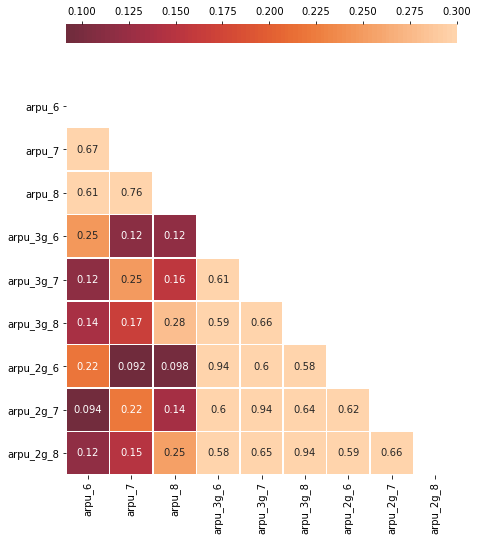

In [82]:
drawCorrPlot(high_cust_churn[arpu_cols].corr())

we can see there are some highly correlated features between arpu columns

#### correlations for mou cols

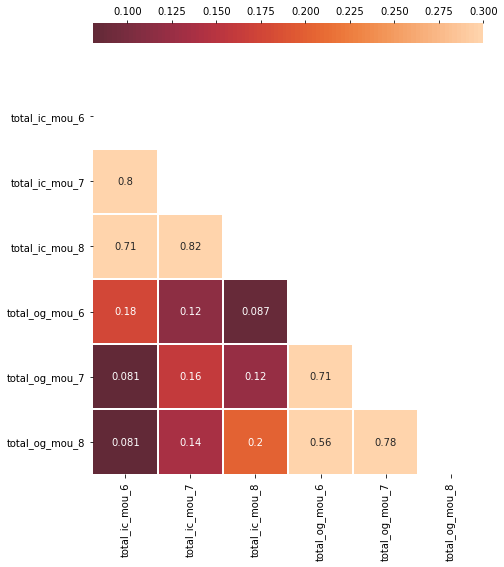

In [83]:
drawCorrPlot(high_cust_churn[total_mou_cols].corr())

## Splitting X and y from the data set

In [84]:
y = high_cust_churn.pop('churn')
X = high_cust_churn.copy()

## Splitting test and train data sets

In [85]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

NameError: name 'train_test_split' is not defined

#### Standardizing the data using standardscalar

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# using standard scalar
scalar = StandardScaler()

In [ ]:
# fit_transform of X data set
arr_X = scalar.fit_transform(X)

In [ ]:
# converting ndarray to dataframe
df_X = pd.DataFrame(arr_X, columns = X.columns)

In [ ]:
# no need to trnasform y as it is categorical

# Building model for predictions

## Dimensionality reduction using PCA

#### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)

In [ ]:
pca.fit(df_X)

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

#### scree plot

In [ ]:
# scree plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [ ]:
# as we can see 90% of data is captured using around 50-60 features

##### creating PCA with 92% of variance

In [ ]:
final_pca = PCA(0.92,random_state=42)
final_pca.fit(df_X)

# scree plot
var_cumu = np.cumsum(final_pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [ ]:
tele_final_array = final_pca.transform(df_X)

In [ ]:
tele_final_X = pd.DataFrame(tele_final_array)

In [ ]:
tele_final_X.shape

In [ ]:
tele_final_y = y

##### Building model

### we will build a random forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=1, max_features=5, random_state=42, oob_score=True)

In [ ]:
%%time
rf.fit(X, y)

In [ ]:
rf.oob_score_

In [ ]:
plot_roc_curve(rf, X, y)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [1, 2, 3, 5],
    'min_samples_leaf': [5, 10, 20, 50],
    'n_estimators': [10, 25]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X, y)

In [ ]:
grid_search.best_score_

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()